# PY Net éléc

Analyse des données de consommation et de production via l'application eco2mix

## Sommaire

* [Partie 1 - Pré-analyse](#partie1)
    * [Section 1.1 - Import des données](#section_1_1)
    * [Section 1.2 - Renommage](#section_1_2)
    * [Section 1.3 - Filtrage](#section_1_3)
    * [Section 1.4 - Séparation des données de conso. de production](#section_1_4)
    * [Section 1.5 - Analyse des données de consommation](#section_1_5)
        * [Section 1.5.1 - Préparation analyse mensuel](#section_1_5_1)
        * [Section 1.5.2 - Synthèse analyse mensuel](#section_1_5_2)
        * [Section 1.5.3 - Analyse hebdomadaire](#section_1_5_3)
        * [Section 1.5.3 - Préparation analyse par tranche horaire](#section_1_5_4)

# Partie 1 - Pré-analyse <a class="anchor" id="Partie1"></a>

## Section 1.1 - Import des données <a class="anchor" id="section_1_1"></a>

In [1]:
#Import des packages
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import des données
df = pd.read_csv("eco2mix-regional-cons-def.csv", sep=";")

In [3]:
#Liste des différentes variables et leur types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875456 entries, 0 to 1875455
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  TCO Thermique (%)    float64
 16  TCH Thermique (%)    float64
 17  TCO Nucléaire (%)    float64
 18  TCH Nucléaire (%)    float64
 19  TCO Eolien (%)       float64
 20  TCH Eolien (%)       float64
 21  TCO Solaire (%)      float64
 22  TCH Solaire (%)      float64
 23  TCO Hydraulique (%)  float64
 24

In [4]:
#Conversion des variables Date et Heure en objet date
df['Date - Heure'] = df['Date'] +'T'+ df['Heure'] 
df['Date - Heure'] = pd.to_datetime(df['Date - Heure'], format="%Y-%m-%dT%H:%M")

#Suppression des colonnes date et heure
df = df.drop(['Date','Heure'], axis=1)

## Section 1.2 - Renommage<a class="anchor" id="section_1_2"></a>
Renommage des différentes colonnes

In [5]:
#Renommage de la colonne date
df = df.rename(columns={'Date - Heure':'Date'})

In [6]:
#supppresion de (MW) et (%) dans les noms de colonnes
df.columns = df.columns.str.replace("(MW)","")
df.columns = df.columns.str.replace("(%)","")

df.columns = df.columns.str.replace("(","")
df.columns = df.columns.str.replace(")","")

df.columns = df.columns.str.rstrip()

#Remplacement des espaces par _ dans les noms de colonnes
df.columns = df.columns.str.replace(" ","_")

C:\Users\menag\AppData\Local\Temp/ipykernel_98840/2013184060.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace("(MW)","")
C:\Users\menag\AppData\Local\Temp/ipykernel_98840/2013184060.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace("(%)","")
C:\Users\menag\AppData\Local\Temp/ipykernel_98840/2013184060.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(","")
C:\Users\menag\AppData\Local\Temp/ipykernel_98840/2013184060.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=Tru

## Section 1.3 - Filtrage<a class="anchor" id="section_1_3"></a>

Sélection d'une région sur une année en vue d'une pré-analyse

In [7]:
#Sélection des données définitives pour la région centre val de loire sur l'année 2020
sample = df.loc[(df.Nature=='Données définitives')&(df.Région=='Centre-Val de Loire')&(df['Date'].dt.year==2020),:]

In [8]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17568 entries, 1472266 to 1683069
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Code_INSEE_région  17568 non-null  int64         
 1   Région             17568 non-null  object        
 2   Nature             17568 non-null  object        
 3   Date               17568 non-null  datetime64[ns]
 4   Consommation       17568 non-null  float64       
 5   Thermique          17568 non-null  float64       
 6   Nucléaire          17568 non-null  float64       
 7   Eolien             17568 non-null  float64       
 8   Solaire            17568 non-null  float64       
 9   Hydraulique        17568 non-null  float64       
 10  Pompage            0 non-null      float64       
 11  Bioénergies        17568 non-null  float64       
 12  Ech._physiques     17568 non-null  float64       
 13  TCO_Thermique      17568 non-null  float64       
 14

## Section 1.4 Séparation des données de conso. de production <a class="anchor" id="section_1_4"></a>

In [9]:
#Séparation des données de consommation de production
prod = sample.iloc[:, [3,5,6,7,8,9,11,14,16,18,20,22,24]]
conso = sample.iloc[:, [3,4,13,15,17,19,21,23]]



Les données de la production par pompage ne sont pas prises en considération, car elles sont nulles sur la région centre.
Dans le but de simplifier les analyses, les données liées aux échanges énergétique sont exclues.

## Section 1.5 - Analyse des données de consommation<a class="anchor" id="section_1_5"></a>

### Section 1.5.1 - Préparation analyse mensuel<a class="anchor" id="section_1_5_1"></a>

In [10]:
#Définition des mois
month = {
    0:'Janv.',
    1:'Fev.',
    2:'Mars',
    3:'Avr.',
    4:'Mai',
    5:'Juin',
    6:'Juil.',
    7:'Aout',
    8:'Sept.',
    9:'Oct.',
    10:'Nov.',
    11:'Dec.'
}

#Calcul des données total consommées
conso_mensuel = conso.groupby(by=conso.Date.dt.month, as_index=False).agg({'Consommation':'sum'}).round(1)

#Remplace de l'index par le mois
conso_mensuel = conso_mensuel.reset_index().rename(columns={'index':'Mois'}).replace(month).set_index('Mois')

#Conversion des données de conso en GW
conso_mensuel = conso_mensuel/1000

### Section 1.5.2 - Synthèse analyse mensuel<a class="anchor" id="section_1_5_2"></a>

Nous estimerons que l'année peut-être découper en 2 saisons distinctes. 
 - La première sera la haute saison où l'hivers. Durant cette saison la consommation sera maximale.
 - La deuxième sera la basse saison où l'été. Durant cette saison la consommation sera minimale.


In [11]:
print("Haute saison :\n",conso_mensuel.sort_values(by='Consommation').head(6).reset_index()['Mois'])
haute_saison = conso_mensuel.sort_values(by='Consommation').head(6).mean().round(2)['Consommation']
print("La conso moyenne durant ces 6 mois est en GW de: ",haute_saison)

Haute saison :
 0     Juin
1     Aout
2      Mai
3    Sept.
4     Avr.
5    Juil.
Name: Mois, dtype: object
La conso moyenne durant ces 6 mois est en GW de:  2466.28


In [12]:
print("Basse saison :\n",conso_mensuel.sort_values(by='Consommation').tail(6).reset_index()['Mois'])
basse_saison = conso_mensuel.sort_values(by='Consommation').tail(6).mean().round(2)['Consommation']
print("La conso moyenne durant ces 6 mois est en GW de :",basse_saison)

Basse saison :
 0     Oct.
1     Nov.
2     Mars
3     Fev.
4     Dec.
5    Janv.
Name: Mois, dtype: object
La conso moyenne durant ces 6 mois est en GW de : 3603.43


In [13]:
print("La différence entre la basse et la haute saison est de %:\n",
(haute_saison/basse_saison)*100
)

La différence entre la basse et la haute saison est de %:
 68.44256722067587


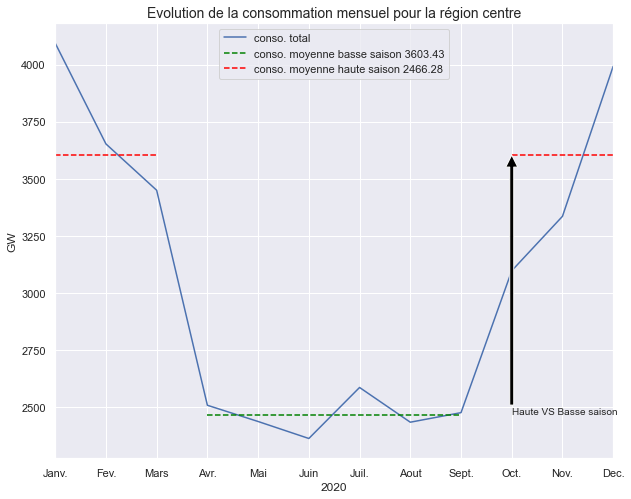

In [14]:
#Création de la figure
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

#Tracé de la courbe de la conso. mensuel
ax1.plot(conso_mensuel, label='conso. total')

#ajout de la conso. moyenne basse saison
ax1.plot([i for i in range(3,9)],[conso_mensuel.sort_values(by='Consommation').head(6).mean()['Consommation'] for i in range(6)], linestyle='--', color='green', label=f"conso. moyenne basse saison {basse_saison}")
#ajout de la conso. moyenne haute saison
ax1.plot([i for i in range(3)],[conso_mensuel.sort_values(by='Consommation').tail(6).mean()['Consommation'] for i in range(3)], linestyle='--', color='red', label=f"conso. moyenne haute saison {haute_saison}")
ax1.plot([i for i in range(9,12)],[conso_mensuel.sort_values(by='Consommation').tail(6).mean()['Consommation'] for i in range(3)], linestyle='--', color='red')

#ajout de la fleche
ax1.annotate('Haute VS Basse saison', xy=(9,basse_saison), xytext=(9,haute_saison), arrowprops={'facecolor':'black'});

#Titre des axes
ax1.set_ylabel('GW')
ax1.set_xlabel('2020')

#Ajout des limites sur l'axe des abscisses
ax1.set_xlim(0,11)

#ajout de la légende
ax1.legend(loc='upper center')

#Titre du graphique
ax1.set_title('Evolution de la consommation mensuel pour la région centre',fontsize=14);

### Section 1.5.3 - Analyse hebdomadaire<a class="anchor" id="section_1_5_3"></a>

In [15]:
#Caclul des données consommées par jour
conso_hebdo = conso.groupby(by=conso.Date.dt.isocalendar().day).agg({'Consommation':'sum'}).round(1).reset_index()

#Renommage des colonnes
conso_hebdo = conso_hebdo.rename(columns={'day':'Jour'})

#Remplacement des numéro par les jours
conso_hebdo['Jour'] = conso_hebdo.Jour.replace([i for i in range(1,8)],['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])

#Conversion en GW
conso_hebdo['Consommation'] = conso_hebdo.Consommation/1000

#retour des conso. hebdomadaire
print(conso_hebdo)

#Différence entre le week-end et la semaine
print("la consommation en semaine est de : ",conso_hebdo.iloc[:5,1].mean())
print("la consommation le week-end est de : ",conso_hebdo.iloc[-2:,1].mean())
print("La différence entre la semaine et le week-end est de %: ",1-((conso_hebdo.iloc[-2:,1].mean())/(conso_hebdo.iloc[:5,1].mean())))


       Jour  Consommation
0     Lundi      5258.296
1     Mardi      5369.837
2  Mercredi      5510.357
3     Jeudi      5510.515
4  Vendredi      5292.027
5    Samedi      4814.973
6  Dimanche      4662.250
la consommation en semaine est de :  5388.2064
la consommation le week-end est de :  4738.6115
La différence entre la semaine et le week-end est de %:  0.12055865194770565


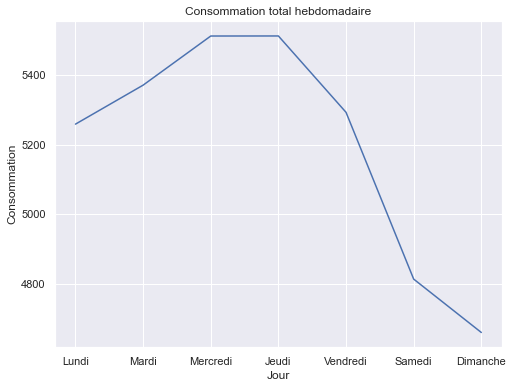

In [16]:
plt.figure(figsize=(8,6))
sns.lineplot(x=conso_hebdo.Jour, y=conso_hebdo.Consommation)
plt.title('Consommation total hebdomadaire');

Il n'y a pas de différence significative entre le week-end et la semaine sur la consommation.

### Section 1.5.4 - Préparation analyse par tranche horaire<a class="anchor" id="section_1_5_4"></a>

In [17]:
#Calcul des données total consommées
conso_heure = conso.groupby(by=conso.Date.dt.hour, as_index=False).agg({'Consommation':'sum'}).round(1)

#Conversion des données de conso en GW
conso_heure = conso_heure/1000



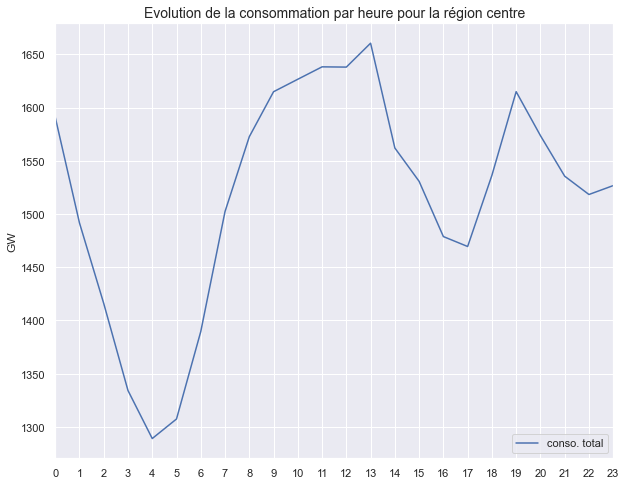

In [18]:
#Création de la figure
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

#Tracé de la courbe de la conso. mensuel
ax1.plot(conso_heure, label='conso. total')

#Titre des axes
ax1.set_ylabel('GW')

#Modification des graduations des abscisses
ax1.set_xticks(range(0,24,1))

#Ajout des limites sur l'axe des abscisses
ax1.set_xlim(0,23,2)

#ajout de la légende
ax1.legend(loc='lower right')

#Titre du graphique
ax1.set_title('Evolution de la consommation par heure pour la région centre',fontsize=14);